# Zadanie 2.2 – Podstawowe przykłady TopFarm2  
Ograniczenia (constraints), minimalne odległości (spacing) i driver

**Cel lekcji:**  
- zrozumieć, jak TopFarm2 wymusza, żeby turbiny nie wychodziły poza wyznaczony obszar (boundary)  
- zobaczyć, co się dzieje, gdy turbiny są za blisko siebie (spacing constraint)  
- nauczyć się wizualizować ograniczenia w prosty sposób  
- zobaczyć, jak Copilot pomaga poprawić wykresy


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Wszystkie ważne importy TopFarm2 załadowane")

Wszystkie ważne importy TopFarm2 załadowane


# Punkty granicy – dowolny wielokąt (tu prosty pentagon)
Przykładowe punkty graniczne użyte w dalszych komórkach (kod rysujący jest w następnej komórce).

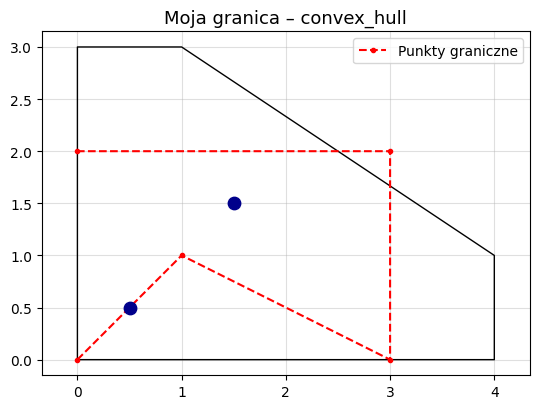

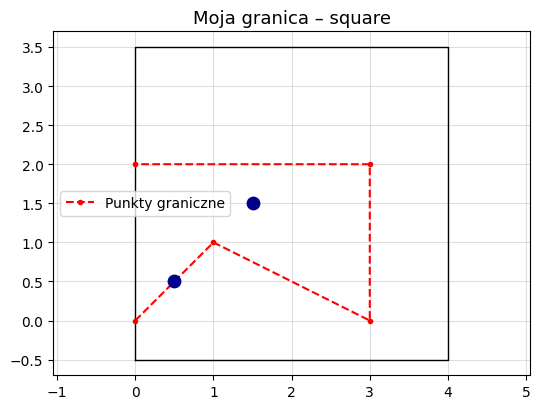

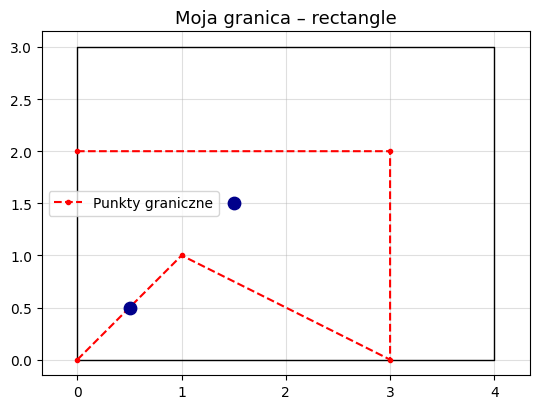

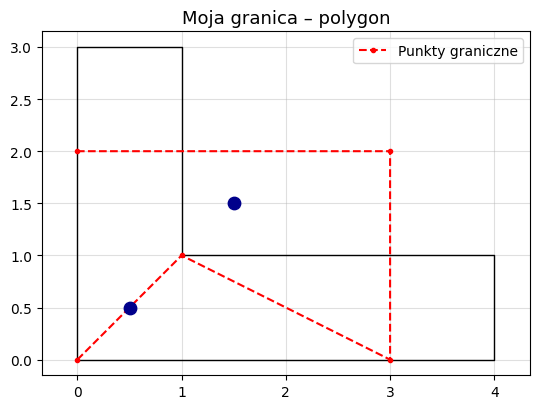

In [8]:
# Przykład własnej granicy – kształt przypominający literę L
moja_granica = np.array([
    [0, 0],
    [4, 0],
    [4, 1],
    [1, 1],
    [1, 3],
    [0, 3],
    [0, 0]          # zamykamy wielokąt
])

for typ in ['convex_hull', 'square', 'rectangle', 'polygon']:
    rysuj_ograniczenie(f'Moja granica – {typ}', XYBoundaryConstraint(moja_granica, typ))

**Własna granica (kształt L)**

Zaprojektowaliśmy nieregularny obszar przypominający literę L.  
Najbardziej naturalnie wygląda **polygon** (dokładnie nasze punkty).  
**Convex_hull** odcina „wnętrza” i daje najprostszy wypukły kształt – często stosowany, gdy chcemy maksymalnie wykorzystać teren.

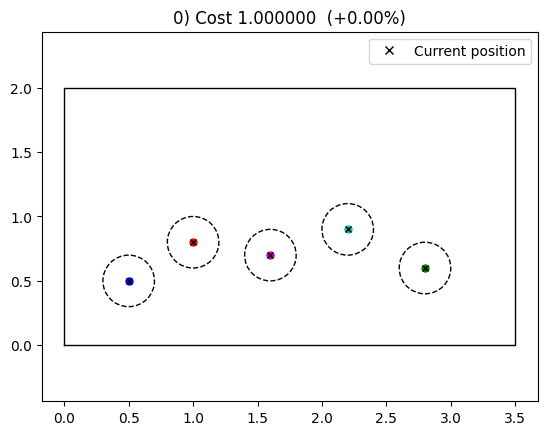

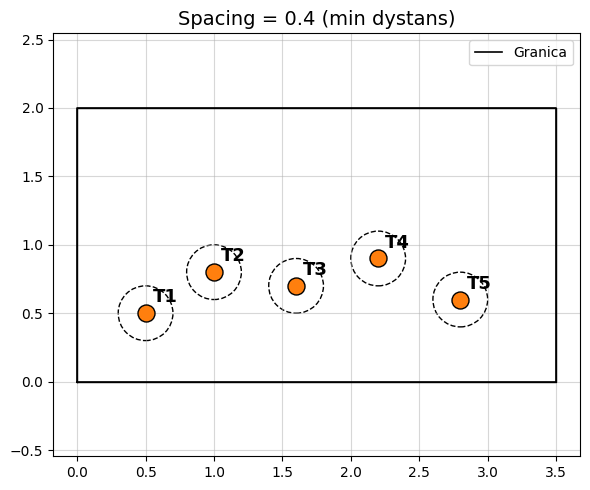

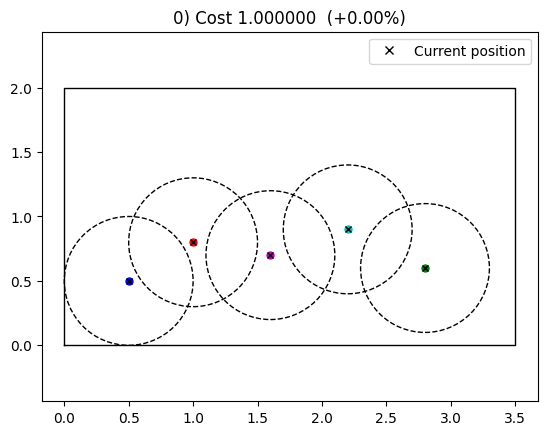

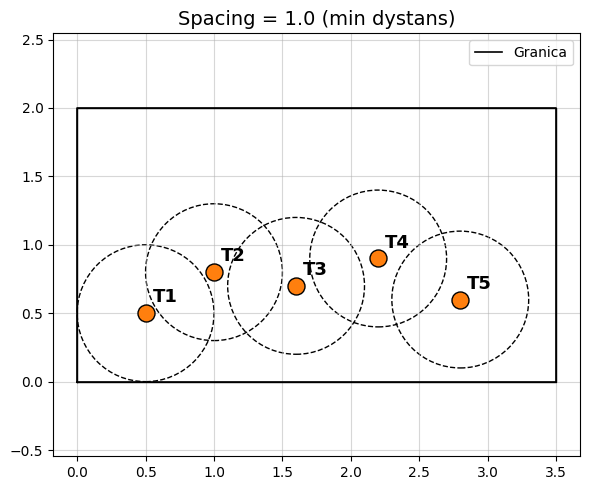

In [11]:
# 5 turbin – początkowo dość blisko
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

duza_granica = np.array([[0,0], [3.5,0], [3.5,2], [0,2], [0,0]])

dummy_cost5 = CostModelComponent([], n_wt=5, cost_function=lambda: 1)

def rysuj_spacing(spacing):
    tf = TopFarmProblem(
        design_vars={'x': x5, 'y': y5},
        cost_comp=dummy_cost5,
        constraints=[
            XYBoundaryConstraint(duza_granica, 'polygon'),
            SpacingConstraint(spacing)
        ],
        plot_comp=XYPlotComp()
    )
    tf.setup()
    tf.evaluate()

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(f"Spacing = {spacing} (min dystans)", fontsize=14)
    # ustawiamy aktywną oś przed wywołaniem plot_constraints()
    plt.sca(ax)
    tf.plot_comp.plot_constraints()
    ax.plot(duza_granica[:,0], duza_granica[:,1], 'k-', lw=1.2, label='Granica', zorder=5)
    ax.scatter(x5, y5, s=150, c='tab:orange', edgecolor='black', zorder=10)
    for i, (xx, yy) in enumerate(zip(x5, y5), 1):
        ax.text(xx + 0.05, yy + 0.05, f'T{i}', fontsize=13, fontweight='bold', va='bottom', ha='left')

    # wyraźne limity, axis equal i siatka
    ax.set_xlim(duza_granica[:,0].min() - 0.2, duza_granica[:,0].max() + 0.2)
    ax.set_ylim(duza_granica[:,1].min() - 0.2, duza_granica[:,1].max() + 0.2)
    ax.axis('equal')
    ax.grid(True, alpha=0.5)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Porównanie dwóch wartości
rysuj_spacing(0.4)
rysuj_spacing(1.0)


**Jak spacing wpływa na układ turbin?**

Przy małym dystansie minimalnym (0.4) większość turbin jest w zielonej strefie → układ jest akceptowalny.  
Przy dużym dystansie (1.0) wiele turbin wpada w czerwoną strefę → układ **nie spełnia** ograniczenia odstępu.  

W rzeczywistej farmie wiatrowej minimalny odstęp to zwykle 3–7 średnic wirnika (np. 400–1000 m), żeby zminimalizować straty na wake i hałas.